In [1]:
import numpy as np
import sys
sys.path.insert(0, './../Libs/')
from lda import TwoClassesLDA, LDA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
cancerData = load_breast_cancer()
scaler = MinMaxScaler()
scaler.fit(cancerData.data)
XScaled = scaler.transform(cancerData.data)

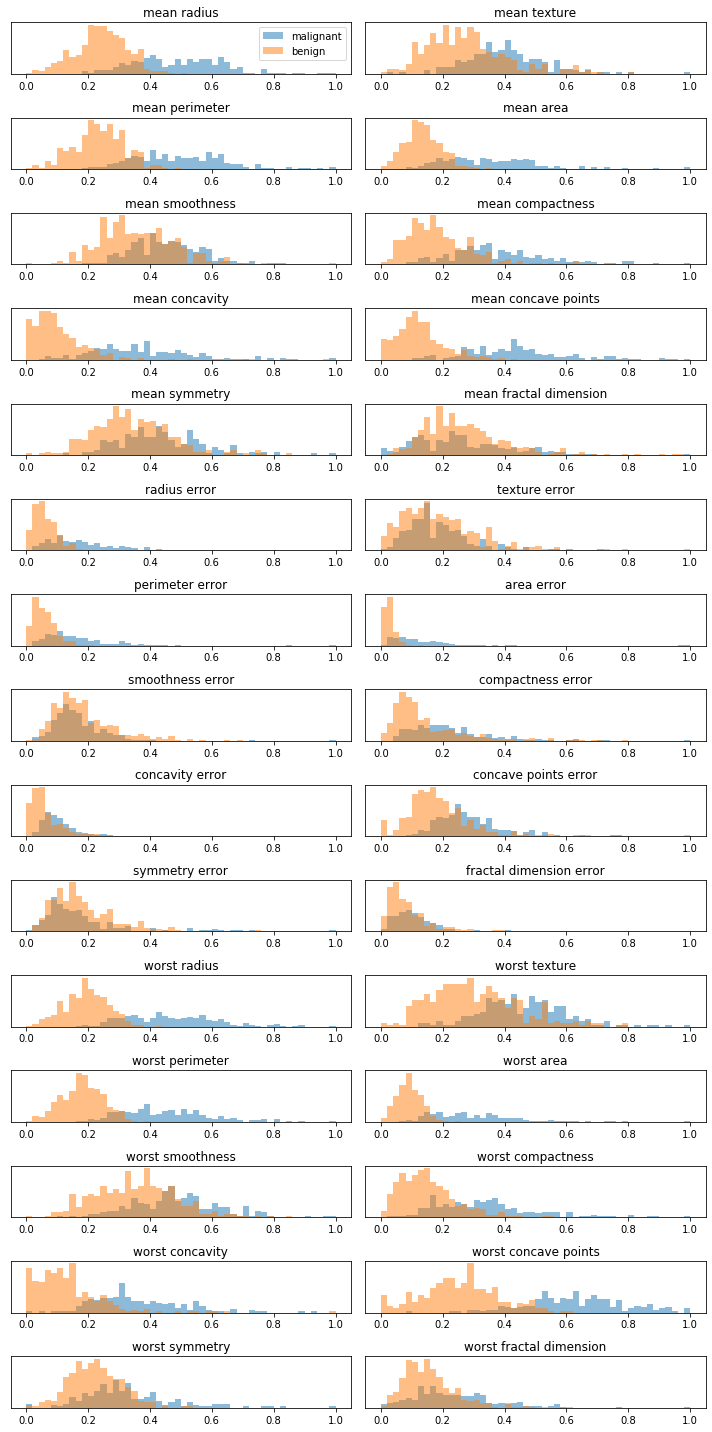

In [3]:
fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = XScaled[cancerData.target == 0]
benign = XScaled[cancerData.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(XScaled[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, alpha = 0.5)
    ax[i].hist(benign[:, i], bins = bins, alpha = 0.5)
    ax[i].set_title(cancerData.feature_names[i])
    ax[i].set_yticks(())
ax[0].legend(["malignant", "benign"], loc = "best")
fig.tight_layout()

In [4]:
lda = LDA().fit(XScaled, cancerData.target)
w = lda.getw()
print(w.shape)

(30, 30)


In [5]:
wChosen = w[:, 0:30]
ldaData = XScaled.dot(wChosen)
print(ldaData[:, 0:5])

[[-0.34784149 -0.40751214 -0.66933068  0.65940791  0.01314665]
 [-0.14691012 -0.52836282 -0.26568758  0.26095878 -0.02339374]
 [-0.1521199  -0.37300586 -0.45476832  0.47254867  0.00566349]
 ...
 [-0.0994511  -0.22232813 -0.24016787  0.16301157 -0.01931411]
 [-0.33875453 -0.31031498 -0.80216049  0.56733953 -0.13626015]
 [ 0.00211762  0.18645056  0.07420493  0.16272396  0.09099876]]


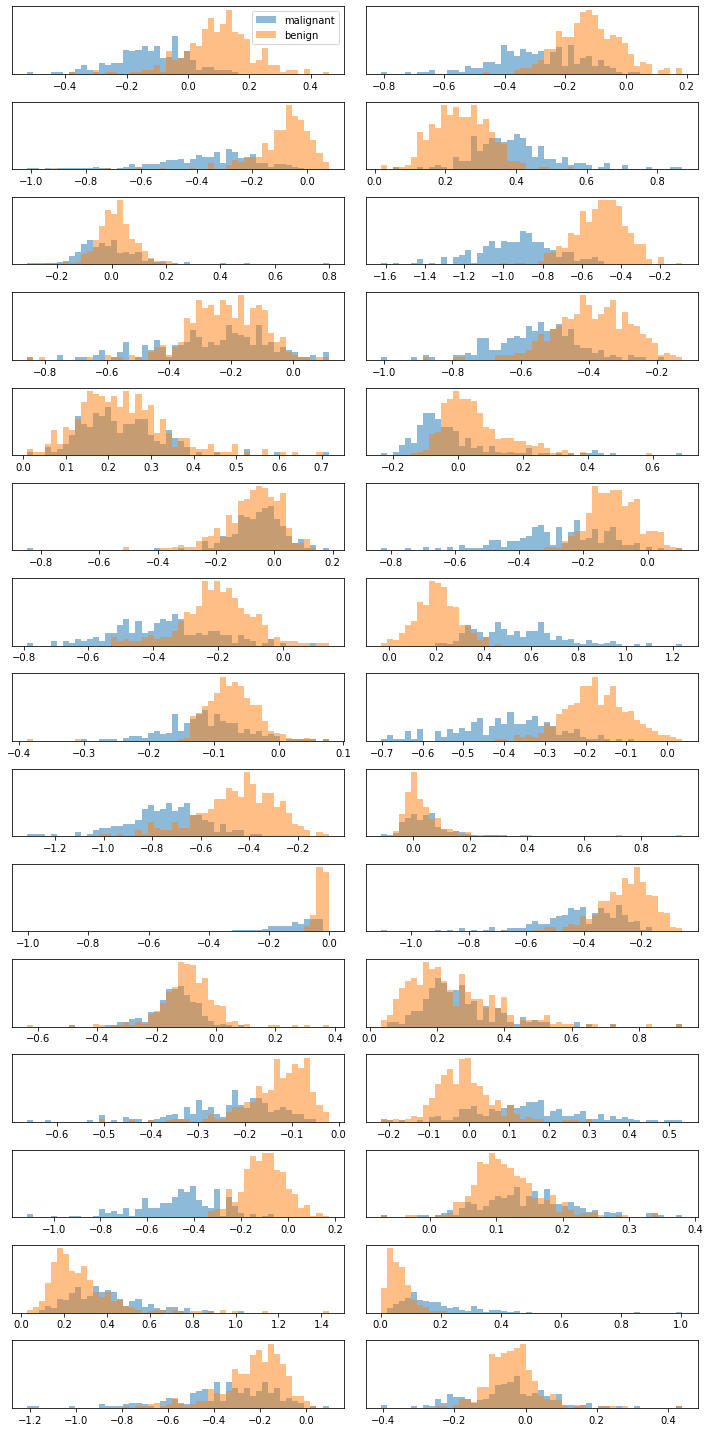

In [6]:
fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = ldaData[cancerData.target == 0]
benign = ldaData[cancerData.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(ldaData[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, alpha = 0.5)
    ax[i].hist(benign[:, i], bins = bins, alpha = 0.5)
    ax[i].set_yticks(())
ax[0].legend(["malignant", "benign"], loc = "best")
fig.tight_layout()